#RNN 기본

In [48]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM, SimpleRNN
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

import os


# brew install graphviz
# pip3 install graphiz
# pip3 install pydot-ng
sample = 'hihello'

char_set = list(set(sample))
char_dic = {w:i for i, w in enumerate(char_set)}

x_str = sample[:-1]
y_str = sample[1:]

data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

x = [char_dic[c] for c in x_str]
y = [char_dic[c] for c in y_str]

x = np_utils.to_categorical(x, num_classes=num_classes)
x = np.reshape(x, (-1, len(x), data_dim))

y = np_utils.to_categorical(y, num_classes=num_classes)
y = np.reshape(y, (-1, len(y), data_dim))

model = Sequential()
model.add(LSTM(num_classes, input_shape=(
    timesteps, data_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

plot_model(model, to_file=os.path.basename('abc') + '.png', show_shapes=True)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['acc'])
model.fit(x, y, epochs=500, batch_size=1)

predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
time_distributed_7 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_14 (Activation)   (None, 6, 5)              0         
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.5726 - acc: 0.1667
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 1.5696 - acc: 0.3333
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 1.5675 - acc: 0.3333
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 1.5656 - acc: 0.3333
Epoch 5/500
1/1 [=====================

In [41]:
print(char_dic)
print(x_str)
print(y_str)
print(data_dim)
print(timesteps)
print(num_classes)
print((np_utils.to_categorical(
    [char_dic[c] for c in x_str], num_classes=num_classes)).shape
     )
print(x.shape)
print(y.shape)

{'o': 0, 'i': 1, 'e': 2, 'l': 3, 'h': 4}
['h', 'i', 'h', 'e', 'l', 'l']
ihello
5
6
5
(6, 5)
(1, 6, 5)
(1, 6, 5)


In [16]:
print(data_dim)
print(timesteps)
print(num_classes)

5
6
5


# RNN 응용

## 주가 종가 예측
1. sort
2. 설계
3. 단위 표준화
4. reshape
5. 훈련 (train 과 test 분리)
6. 원데이터 단위로 복구
7. RMSE, MSE 측정
8. 시각화

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 22 14:51:30 2019

1. sort
2. 설계
3. 단위 표준화
4. reshape
5. 훈련 (train 과 test 분리)
6. 원데이터 단위로 복구
7. RMSE, MSE 측정
8. 시각화

@author: Affinity
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.utils.vis_utils import plot_model

tf.set_random_seed(777)

seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

xy1 = np.loadtxt('/content/drive/My Drive/lecture/l_d/p6/DeepLearningZeroToAll-master/data-02-stock_daily.csv',
                 delimiter=',')
xy1 = xy1[::-1]
min1 = np.min(xy1, 0)
max1 = np.max(xy1, 0)

xy = (xy1 - min1)/(max1 - min1)

xy[1]
x = xy
y0 = xy[:, -1]
y = xy[:, [-1]]

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i: i + seq_length]
    _y = y[i + seq_length]
    print(_x, '->', _y)
    dataX.append(_x)
    dataY.append(_y)

dataX[0]
train_size = int(len(dataY) * 0.7)
test_size = int(len(dataY)) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
        dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
        dataY[train_size:len(dataY)])

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.LSTM(10, input_shape=(seq_length, data_dim)
                                ))
# model3.add(tf.keras.layers.Dropout(0.2))
# model3.add(tf.keras.layers.LSTM(10, return_sequences=False))
model3.add(tf.keras.layers.Dense(1))
optimizer = (tf.train.AdamOptimizer(0.01))
# model3.add(tf.keras.layers.Activation('linear'))

model3.summary()

# plot_model(model3, to_file=os.path.basename('abc') + 'png', show_shapes=True)

model3.compile(loss='mean_squared_error', optimizer=optimizer)

print(trainX.shape, trainY.shape)

model3.fit(trainX, trainY, epochs=200)

testPredict = model3.predict(testX)

print(testPredict)
plt.plot(testY)
plt.plot(testPredict)
plt.show()


# RNN 실습 
##강수량 예측

In [63]:
pip install numpy==1.14

     |████████████████████████████████| 17.2MB 3.3MB/s 
ERROR: tensorflow 1.14.0 has requirement numpy<2.0,>=1.14.5, but you'll have numpy 1.14.0 which is incompatible.
ERROR: spacy 2.1.6 has requirement numpy>=1.15.0, but you'll have numpy 1.14.0 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.0 which is incompatible.
ERROR: fastai 1.0.55 has requirement numpy>=1.15, but you'll have numpy 1.14.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: blis 0.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

path = '/content/drive/My Drive/lecture/l_d/p6/'
data = pd.read_csv(path + 'temp_20190722163901.csv', encoding='ISO-8859-1')

data.head()

data2 = data.iloc[:, 1:]
data2.head()
data2.columns = ['일시', '평균기온', '일강수량', '평균풍속', '평균이슬점온도',
             '평균현지기압', '평균해면기압', '평균전운량','평균중하충운량',
             '평균지면온도']
data2.head()
cols = data2.columns.tolist()
cols = cols[:2] + cols[3:] + [cols[2]]
cols
data2 = data2[cols]

data2['일강수량'].fillna(0, inplace=True)
data2.fillna(data2.mean(), inplace=True)


data2
data2 = data2.iloc[:, 1:]
xy1 = data2.values

seq_length = 14
data_dim = 9
hidden_dim = 10
output_dim = 1
learning_rate = 0.0001
iterations = 50

min1 = np.min(xy1, 0)
max1 = np.max(xy1, 0)

xy = (xy1 - min1)/(max1 - min1)

x = xy
y0 = xy[:, -1]
y = xy[:, [-1]]


dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i: i + seq_length]
    _y = y[i + seq_length]
#    print(_x, '->', _y)
    dataX.append(_x)
    dataY.append(_y)

# dataX[0]

train_size = int(len(dataY) * 0.7)
test_size = int(len(dataY)) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
        dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
        dataY[train_size:len(dataY)])

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.LSTM(200, input_shape=(seq_length, data_dim),
                                return_sequences=True
                                ))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.LSTM(100, return_sequences=False))
model3.add(tf.keras.layers.Dense(1))
optimizer = (tf.train.RMSPropOptimizer(learning_rate))
# model3.add(tf.keras.layers.Activation('linear'))

model3.summary()

# plot_model(model3, to_file=os.path.basename('abc') + 'png', show_shapes=True)

model3.compile(loss='mean_squared_error', optimizer=optimizer,
               metrics=['acc', 'mse', 'mae'])

print(trainX.shape, trainY.shape)

model3.fit(trainX, trainY, epochs=iterations)

testPredict = model3.predict(testX)

print(testPredict)
plt.plot(testY)
plt.plot(testPredict)
plt.show()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 14, 200)           168000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 200)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               120400    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 288,501
Trainable params: 288,501
Non-trainable params: 0
_________________________________________________________________
(2326, 14, 9) (2326, 1)
Epoch 1/50
2326/2326 [==============================] - 4s 2ms/sample - loss: 0.0067 - acc: 0.7068 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0463
Epoch 2/50
2326/2326 [==============================] - 3s 1ms/

KeyboardInterrupt: ignored

[[ 1.05408952e-02]
 [ 4.55546454e-02]
 [ 3.54056135e-02]
 [ 2.95252986e-02]
 [ 8.24713707e-03]
 [ 3.13763022e-02]
 [-2.44872179e-03]
 [-4.91610356e-03]
 [ 4.38796682e-03]
 [-7.07363430e-03]
 [-2.34439876e-03]
 [ 7.87463486e-02]
 [ 4.08189259e-02]
 [ 5.24203293e-03]
 [ 1.34122549e-02]
 [ 2.14764141e-02]
 [-1.16824331e-02]
 [ 8.21223017e-03]
 [ 3.22168805e-02]
 [ 2.98040360e-02]
 [ 1.28156506e-02]
 [ 1.54345017e-02]
 [ 1.13228932e-02]
 [ 2.22751163e-02]
 [ 7.50554074e-03]
 [ 1.93728693e-02]
 [ 2.74412483e-02]
 [ 1.96859203e-02]
 [ 2.64920592e-02]
 [-1.07757607e-02]
 [ 7.34350644e-04]
 [ 1.36116380e-02]
 [ 1.68642811e-02]
 [ 5.88257657e-03]
 [ 3.17749530e-02]
 [ 4.10284996e-02]
 [ 8.21049139e-03]
 [ 6.90838322e-03]
 [ 8.71569850e-03]
 [ 5.55609819e-03]
 [-6.84394781e-03]
 [ 1.97827816e-03]
 [-1.83645543e-03]
 [-5.54353930e-04]
 [-2.36667693e-03]
 [ 8.82480480e-03]
 [ 4.61037178e-03]
 [ 2.40152292e-02]
 [ 2.13449262e-02]
 [ 2.86448561e-02]
 [-6.04797993e-03]
 [-1.24861486e-04]
 [ 1.2795298

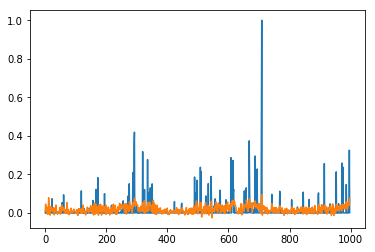

In [11]:
testPredict = model3.predict(testX)

print(testPredict)
plt.plot(testY)
plt.plot(testPredict)
plt.show()
